In [ ]:
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim=784, h_dim=400, z_dim=20):
        super(VAE, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, h_dim)
        self.fc21 = nn.Linear(h_dim, z_dim)  # Mean of latent space
        self.fc22 = nn.Linear(h_dim, z_dim)  # Log-variance of latent space

        # Decoder
        self.fc3 = nn.Linear(z_dim, h_dim)
        self.fc4 = nn.Linear(h_dim, input_dim)

    def encode(self, x):
        h = F.relu(self.fc1(x))
        return self.fc21(h), self.fc22(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [ ]:
def vae_loss(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [ ]:
train_path = r"C:\Users\hbse\projects\data\metrics\train"
test_path = r"C:\Users\hbse\projects\data\metrics\test"

epoch 0 batch_idx=0


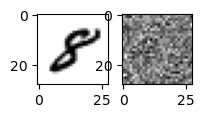

epoch 0 batch_idx=50


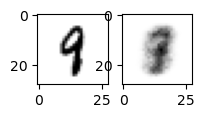

epoch 0 batch_idx=100


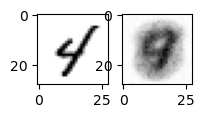

epoch 0 batch_idx=150


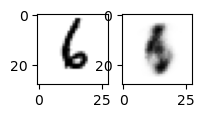

epoch 0 batch_idx=200


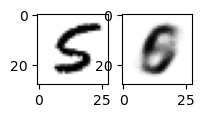

epoch 0 batch_idx=250


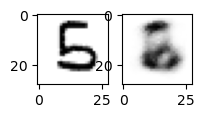

epoch 0 batch_idx=300


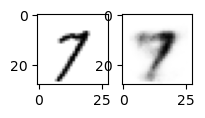

epoch 0 batch_idx=350


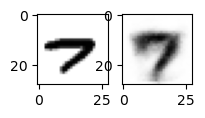

epoch 0 batch_idx=400


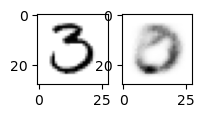

epoch 0 batch_idx=450


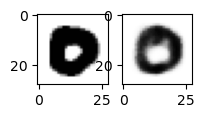

Epoch: 1, Loss: 172.7513
epoch 1 batch_idx=0


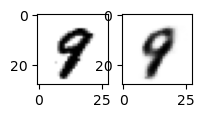

epoch 1 batch_idx=50


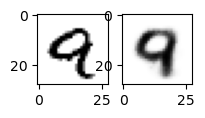

epoch 1 batch_idx=100


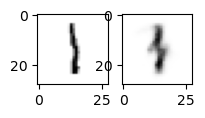

epoch 1 batch_idx=150


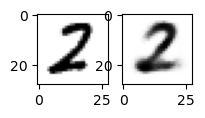

epoch 1 batch_idx=200


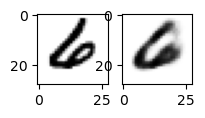

epoch 1 batch_idx=250


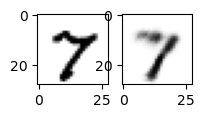

epoch 1 batch_idx=300


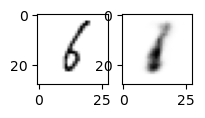

epoch 1 batch_idx=350


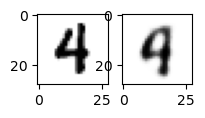

epoch 1 batch_idx=400


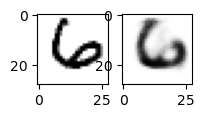

epoch 1 batch_idx=450


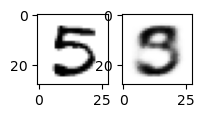

Epoch: 2, Loss: 130.0593
epoch 2 batch_idx=0


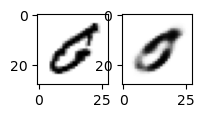

epoch 2 batch_idx=50


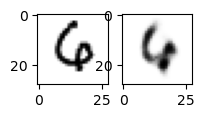

epoch 2 batch_idx=100


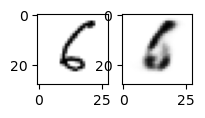

epoch 2 batch_idx=150


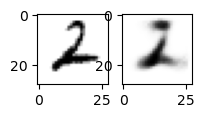

epoch 2 batch_idx=200


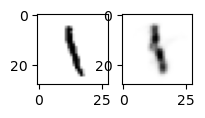

epoch 2 batch_idx=250


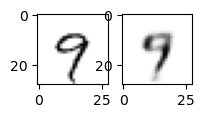

epoch 2 batch_idx=300


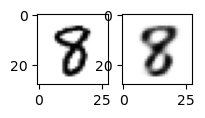

epoch 2 batch_idx=350


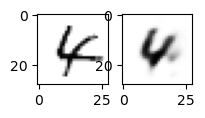

epoch 2 batch_idx=400


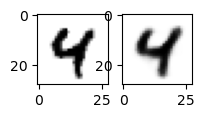

epoch 2 batch_idx=450


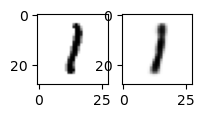

Epoch: 3, Loss: 119.0025
epoch 3 batch_idx=0


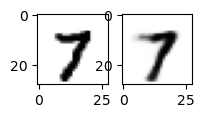

epoch 3 batch_idx=50


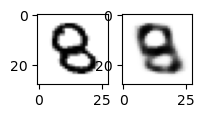

epoch 3 batch_idx=100


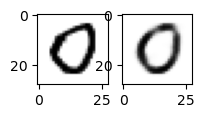

epoch 3 batch_idx=150


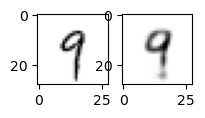

epoch 3 batch_idx=200


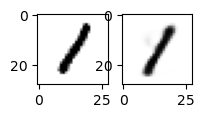

epoch 3 batch_idx=250


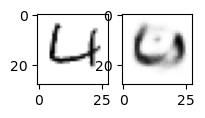

epoch 3 batch_idx=300


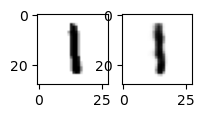

epoch 3 batch_idx=350


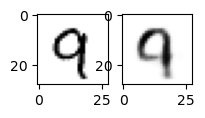

epoch 3 batch_idx=400


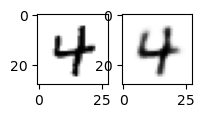

epoch 3 batch_idx=450


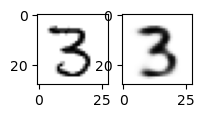

Epoch: 4, Loss: 113.7952
epoch 4 batch_idx=0


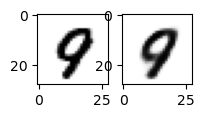

epoch 4 batch_idx=50


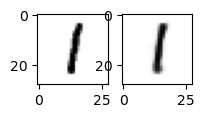

epoch 4 batch_idx=100


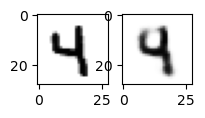

epoch 4 batch_idx=150


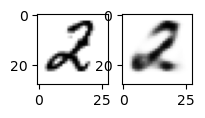

epoch 4 batch_idx=200


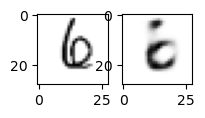

epoch 4 batch_idx=250


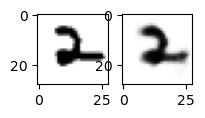

epoch 4 batch_idx=300


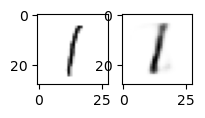

epoch 4 batch_idx=350


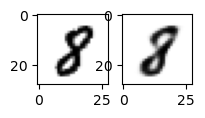

epoch 4 batch_idx=400


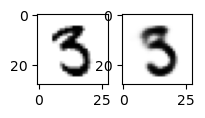

epoch 4 batch_idx=450


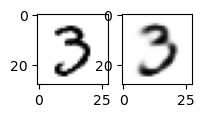

Epoch: 5, Loss: 110.9217
epoch 5 batch_idx=0


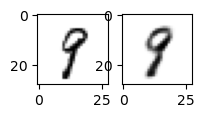

epoch 5 batch_idx=50


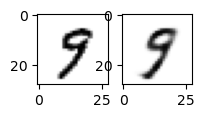

epoch 5 batch_idx=100


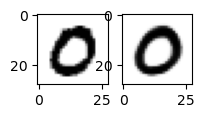

epoch 5 batch_idx=150


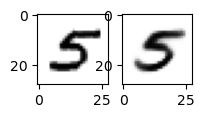

epoch 5 batch_idx=200


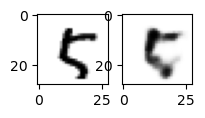

epoch 5 batch_idx=250


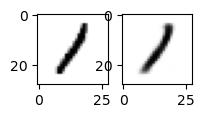

epoch 5 batch_idx=300


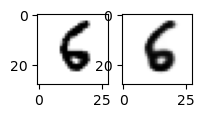

epoch 5 batch_idx=350


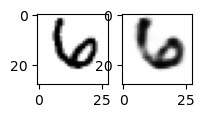

epoch 5 batch_idx=400


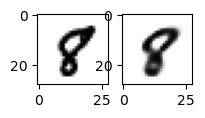

epoch 5 batch_idx=450


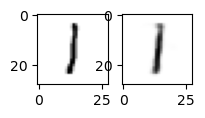

Epoch: 6, Loss: 109.2207
epoch 6 batch_idx=0


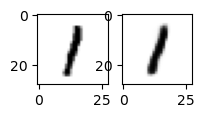

epoch 6 batch_idx=50


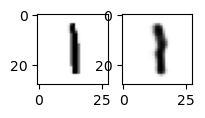

epoch 6 batch_idx=100


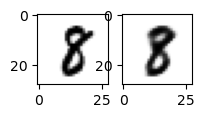

epoch 6 batch_idx=150


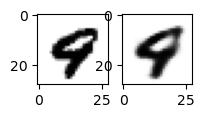

epoch 6 batch_idx=200


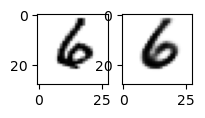

epoch 6 batch_idx=250


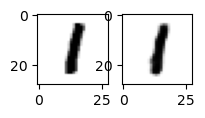

epoch 6 batch_idx=300


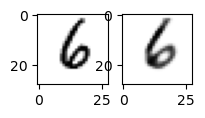

epoch 6 batch_idx=350


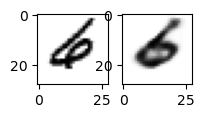

epoch 6 batch_idx=400


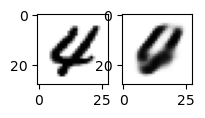

epoch 6 batch_idx=450


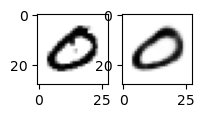

Epoch: 7, Loss: 108.0995
epoch 7 batch_idx=0


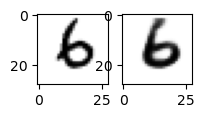

epoch 7 batch_idx=50


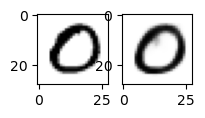

epoch 7 batch_idx=100


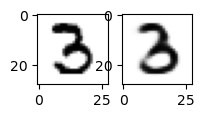

epoch 7 batch_idx=150


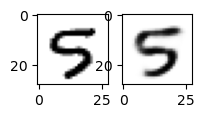

epoch 7 batch_idx=200


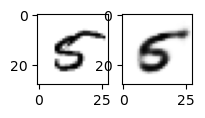

epoch 7 batch_idx=250


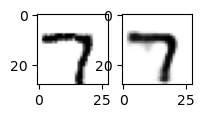

epoch 7 batch_idx=300


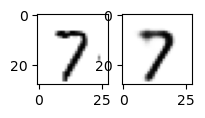

epoch 7 batch_idx=350


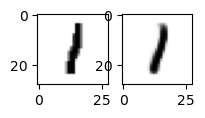

epoch 7 batch_idx=400


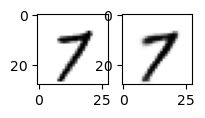

epoch 7 batch_idx=450


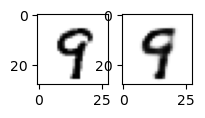

Epoch: 8, Loss: 107.2861
epoch 8 batch_idx=0


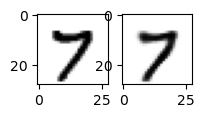

epoch 8 batch_idx=50


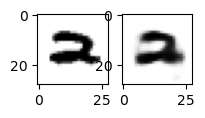

epoch 8 batch_idx=100


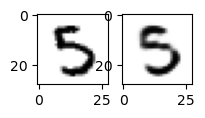

epoch 8 batch_idx=150


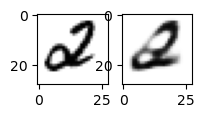

epoch 8 batch_idx=200


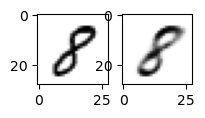

epoch 8 batch_idx=250


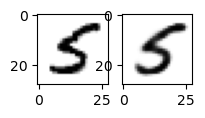

epoch 8 batch_idx=300


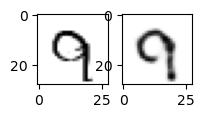

epoch 8 batch_idx=350


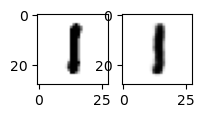

epoch 8 batch_idx=400


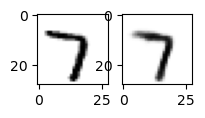

epoch 8 batch_idx=450


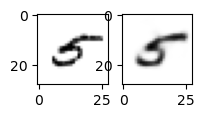

Epoch: 9, Loss: 106.6706
epoch 9 batch_idx=0


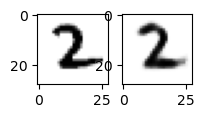

epoch 9 batch_idx=50


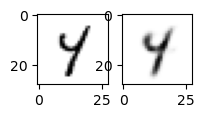

epoch 9 batch_idx=100


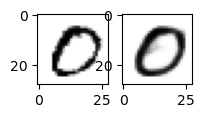

epoch 9 batch_idx=150


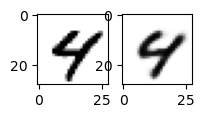

epoch 9 batch_idx=200


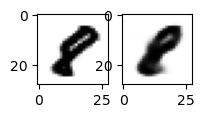

epoch 9 batch_idx=250


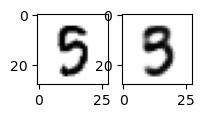

epoch 9 batch_idx=300


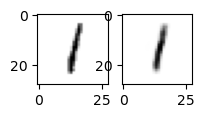

epoch 9 batch_idx=350


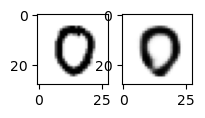

epoch 9 batch_idx=400


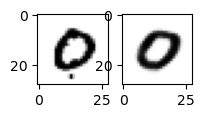

epoch 9 batch_idx=450


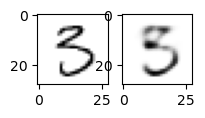

Epoch: 10, Loss: 106.2378


In [ ]:
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root=train_path, train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE(z_dim=100).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# epochs = 10
epochs = 10
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        if batch_idx%50==0:
            print(f"epoch {epoch} batch_idx={batch_idx}")
        # if batch_idx%100==0 and epoch==(epochs-1):
            plt.figure(figsize=(2,2))
            plt.subplot(1,2,1)
            plt.imshow(data[0].squeeze().cpu().detach().numpy(), cmap='gray_r')
            plt.subplot(1,2,2)
            plt.imshow(recon_batch[0].view(28, 28).cpu().detach().numpy(), cmap='gray_r')
            plt.show()
        loss = vae_loss(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print(f'Epoch: {epoch+1}, Loss: {train_loss / len(train_loader.dataset):.4f}')

In [ ]:
img, label = train_dataset[0]
img = img[0]

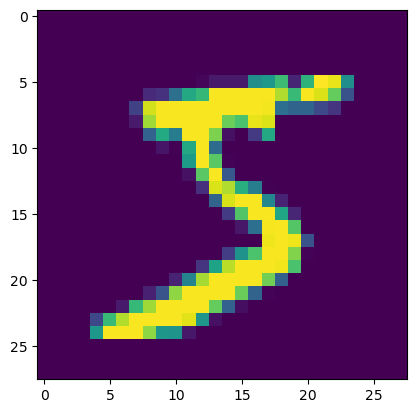

In [ ]:
plt.imshow(img)

In [ ]:
# list(list(model.children())[0].parameters())

In [ ]:
img.to('cpu');
model.to('cpu');

In [ ]:
recon, _, _ = model(img)

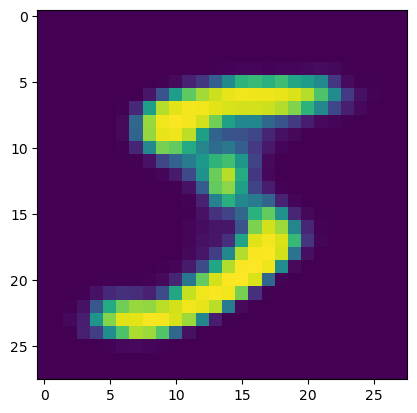

In [ ]:
plt.imshow(recon.view(28,28).detach().numpy())